## Import Necessary Packages

In [2]:
import tensorflow as tf
import numpy as np
import string
import sys
import matplotlib.pyplot as plt
from pickle import dump
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN
from tensorflow.keras.models import Sequential

### Data Preprocessing

In [3]:
filename="t8.shakespeare.txt"
raw_data = open(filename, 'r', encoding='utf-8').read()
raw_data[:500]

"                     1\n  From fairest creatures we desire increase,\n  That thereby beauty's rose might never die,\n  But as the riper should by time decease,\n  His tender heir might bear his memory:\n  But thou contracted to thine own bright eyes,\n  Feed'st thy light's flame with self-substantial fuel,\n  Making a famine where abundance lies,\n  Thy self thy foe, to thy sweet self too cruel:\n  Thou that art now the world's fresh ornament,\n  And only herald to the gaudy spring,\n  Within thine own bud"

In [4]:
lower_text = raw_data.lower()
words = lower_text.split()
# To remove punctuations
table = str.maketrans('','', string.punctuation)
words = [w.translate(table) for w in words]
# Remove anything that is not alphabetic
words = [word for word in words if word.isalpha()]

print(words[:100])
print("Total words = ", len(words))
print("Unique words =  ", len(set(words)))

['from', 'fairest', 'creatures', 'we', 'desire', 'increase', 'that', 'thereby', 'beautys', 'rose', 'might', 'never', 'die', 'but', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease', 'his', 'tender', 'heir', 'might', 'bear', 'his', 'memory', 'but', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes', 'feedst', 'thy', 'lights', 'flame', 'with', 'selfsubstantial', 'fuel', 'making', 'a', 'famine', 'where', 'abundance', 'lies', 'thy', 'self', 'thy', 'foe', 'to', 'thy', 'sweet', 'self', 'too', 'cruel', 'thou', 'that', 'art', 'now', 'the', 'worlds', 'fresh', 'ornament', 'and', 'only', 'herald', 'to', 'the', 'gaudy', 'spring', 'within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content', 'and', 'tender', 'churl', 'makst', 'waste', 'in', 'niggarding', 'pity', 'the', 'world', 'or', 'else', 'this', 'glutton', 'be', 'to', 'eat', 'the', 'worlds']
Total words =  17582
Unique words =   3178


In [5]:
length = 10 + 1
sentences = []
for i in range(length, len(words)):
    seq = words[i-length:i]
    line = ' '.join(seq)
    sentences.append(line)

print(sentences[:5])
print("Total sentences: ", len(sentences))

['from fairest creatures we desire increase that thereby beautys rose might', 'fairest creatures we desire increase that thereby beautys rose might never', 'creatures we desire increase that thereby beautys rose might never die', 'we desire increase that thereby beautys rose might never die but', 'desire increase that thereby beautys rose might never die but as']
Total sentences:  17571


### Tokenize the sentences

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
numeric_sentences = tokenizer.texts_to_sequences(sentences)

print("TEXT DATA: \n",sentences[:5])
print("NUMERIC ENCODING: \n",numeric_sentences[:5])
print("MAPPING: ",{k: tokenizer.word_index[k] for k in list(tokenizer.word_index)[:10]})

TEXT DATA: 
 ['from fairest creatures we desire increase that thereby beautys rose might', 'fairest creatures we desire increase that thereby beautys rose might never', 'creatures we desire increase that thereby beautys rose might never die', 'we desire increase that thereby beautys rose might never die but', 'desire increase that thereby beautys rose might never die but as']
NUMERIC ENCODING: 
 [[34, 499, 1356, 176, 228, 633, 8, 1355, 142, 405, 100], [499, 1356, 176, 228, 633, 8, 1355, 142, 405, 100, 161], [1356, 176, 228, 633, 8, 1355, 142, 405, 100, 161, 193], [176, 228, 633, 8, 1355, 142, 405, 100, 161, 193, 16], [228, 633, 8, 1355, 142, 405, 100, 161, 193, 16, 22]]
MAPPING:  {'and': 1, 'the': 2, 'to': 3, 'my': 4, 'of': 5, 'i': 6, 'in': 7, 'that': 8, 'thy': 9, 'thou': 10}


In [7]:
vocabulary_size = len(tokenizer.word_index) + 1
data_array = np.array(numeric_sentences)
X, y = data_array[:,:-1], data_array[:,-1]
y = to_categorical(y, num_classes=vocabulary_size)
input_length = X.shape[1]
print("Vocabulary Size: ", vocabulary_size)
print("Shape of X: ",X.shape)
print("Shape of y: ", y.shape)
print("Input length: ", input_length)

Vocabulary Size:  3179
Shape of X:  (17571, 10)
Shape of y:  (17571, 3179)
Input length:  10


### Build and train the model

In [9]:
def rnn_model():
    model = Sequential()
    model.add(Embedding(vocabulary_size, 50, input_length=input_length))
    model.add(SimpleRNN(25, return_sequences=True))
    model.add(SimpleRNN(25))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(vocabulary_size, activation='softmax'))
    return model

model = rnn_model()
lr = 0.0009
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(loss = 'categorical_crossentropy',optimizer = optimizer, metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 50)            158950    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 10, 25)            1900      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 25)                1275      
_________________________________________________________________
dense (Dense)                (None, 50)                1300      
_________________________________________________________________
dense_1 (Dense)              (None, 3179)              162129    
Total params: 325,554
Trainable params: 325,554
Non-trainable params: 0
_________________________________________________________________


In [10]:
batch_size = 128
epochs = 150
history = model.fit(X, y, batch_size=batch_size, epochs = epochs)

Train on 17571 samples
Epoch 1/150
17571/17571 [==============================] - 4s 232us/sample - loss: 6.9870 - accuracy: 0.0226
Epoch 2/150
17571/17571 [==============================] - 2s 129us/sample - loss: 6.4563 - accuracy: 0.0266
Epoch 3/150
17571/17571 [==============================] - 2s 126us/sample - loss: 6.3988 - accuracy: 0.0278
Epoch 4/150
17571/17571 [==============================] - 2s 131us/sample - loss: 6.1944 - accuracy: 0.0318
Epoch 5/150
17571/17571 [==============================] - 2s 133us/sample - loss: 5.9181 - accuracy: 0.0369
Epoch 6/150
17571/17571 [==============================] - 3s 145us/sample - loss: 5.6752 - accuracy: 0.0452
Epoch 7/150
17571/17571 [==============================] - 2s 132us/sample - loss: 5.4792 - accuracy: 0.0525
Epoch 8/150
17571/17571 [==============================] - 3s 147us/sample - loss: 5.3079 - accuracy: 0.0612
Epoch 9/150
17571/17571 [==============================] - 3s 146us/sample - loss: 5.1558 - accuracy: 0.0

17571/17571 [==============================] - 3s 173us/sample - loss: 0.1336 - accuracy: 0.9789
Epoch 150/150
17571/17571 [==============================] - 3s 171us/sample - loss: 0.1278 - accuracy: 0.9816


### Plotting the training history

Text(0, 0.5, 'Loss')

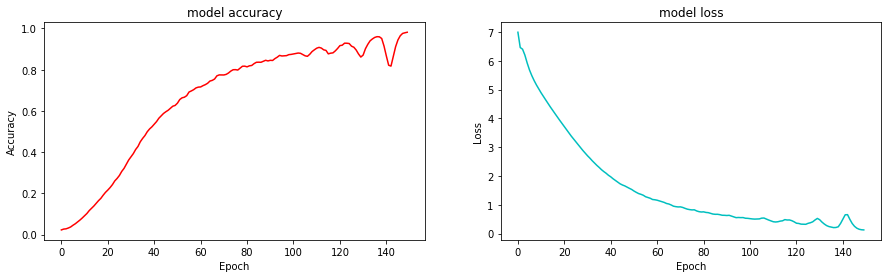

In [11]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color='r')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],color='c')
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

### Saving the model and tokenizer

In [12]:
model.save('mode_RNN_Shakesphere_150.h5')
dump(tokenizer, open('tokenizer.pkl', 'wb'))

### Generating sentences from the model

In [16]:
def poem_generator():
    user_input = input("Write the first line of your poem, the poem generator will complete it!!   ")
    in_text = user_input.lower()
    sys.stdout.write('\n\nYour Poem\n\n')
    start = ' '+ in_text+'\n'
    sys.stdout.write(start)
    for i in range(99):
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = pad_sequences([encoded], maxlen = input_length, truncating = 'pre')
        predicted = model.predict_classes(encoded, verbose = 0)
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                out_word = word
                break
        in_text += ' ' + out_word
        out_word = ' ' + out_word
        if i % 7 ==0 and i !=0:
            out_word = out_word + '\n'

        sys.stdout.write(out_word)
        sys.stdout.flush()

In [17]:
poem_generator()

Write the first line of your poem, the poem generator will complete it!!   time is slow for those who wait


Your Poem

 time is slow for those who wait
 fair sweetest reserve for for thy self the
 day doth hang pitch for all have
 mourn or wide him it her his
 heart such lie of all thy heart
 and him so if i art but
 ever be not is you beauty excuse
 a lays are beauties that you alone
 is thy true shall one as mine
 in love is now you much being
 beautys alone thee do not alone things
 in a shade or i shall every
 cheater do effect my wondrous shall state
 to spirit to one be love he
 are ill recured than thou hearts because
